- https://seaborn.pydata.org/tutorial/color_palettes.html#colormaps

# 🗻 Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/Dataset/"

# ⏬ Importing and Installing Modules

In [3]:
!pip install tensorflow

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Import other regression models you want to consider
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#📖 Reading CSV files

In [5]:
df_column_defs = pd.read_excel(path + 'ColumnDefinitions.xlsx')

df_column_defs

,Variable Name,Variable Description
0,SEQN,Respondent sequence number.
1,RIDSTATR,Interview and examination status of the partic...
2,RIAGENDR,Gender of the participant.
3,RIDAGEYR,Age in years of the participant at the time of...
4,RIDAGEMN,Age in months of the participant at the time o...
...,...,...
5378,SXQ280,Are you circumcised or uncircumcised?
5379,SEQN,Respondent sequence number.
5380,URXUTRI,"Trichomonas, urine"
5381,SEQN,Respondent sequence number


In [6]:
df_demographic = pd.read_csv(path + 'demographic.csv')


for column in df_demographic.columns:
  total_count = len(df_demographic[column])
  zero_count = (df_demographic[column] == 0).sum()
  nan_count = (df_demographic[column].isna()).sum()
  nan_percentage = (nan_count / total_count) * 100
  print(f"Column '{column}': {nan_count} cells with a value of NaN")
  print(f"Column '{column}': {zero_count} cells with a value of 0")
  print(f"Column '{column}': {nan_percentage:.2f}% of cells with a value of NaN")
  print("------------------------------------------------------------------------")

df_demographic.head(n=10)

Column 'SEQN': 0 cells with a value of NaN
Column 'SEQN': 0 cells with a value of 0
Column 'SEQN': 0.00% of cells with a value of NaN
------------------------------------------------------------------------
Column 'SDDSRVYR': 0 cells with a value of NaN
Column 'SDDSRVYR': 0 cells with a value of 0
Column 'SDDSRVYR': 0.00% of cells with a value of NaN
------------------------------------------------------------------------
Column 'RIDSTATR': 0 cells with a value of NaN
Column 'RIDSTATR': 0 cells with a value of 0
Column 'RIDSTATR': 0.00% of cells with a value of NaN
------------------------------------------------------------------------
Column 'RIAGENDR': 0 cells with a value of NaN
Column 'RIAGENDR': 0 cells with a value of 0
Column 'RIAGENDR': 0.00% of cells with a value of NaN
------------------------------------------------------------------------
Column 'RIDAGEYR': 0 cells with a value of NaN
Column 'RIDAGEYR': 405 cells with a value of 0
Column 'RIDAGEYR': 0.00% of cells with a v

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00
5,73562,8,2,1,56,NaN,1,1,1.0,NaN,...,4.0,3.0,NaN,24978.144602,25344.992359,1,111,9.0,9.0,4.79
6,73563,8,2,1,0,5.0,3,3,2.0,6.0,...,5.0,1.0,5.0,18040.818432,17913.555067,1,105,15.0,15.0,5.00
7,73564,8,2,2,61,NaN,3,3,2.0,NaN,...,5.0,2.0,NaN,60325.095254,61758.654880,1,114,10.0,10.0,5.00
8,73565,8,1,1,42,NaN,2,2,NaN,NaN,...,3.0,1.0,5.0,23307.675629,0.000000,2,106,15.0,15.0,5.00
9,73566,8,2,2,56,NaN,3,3,1.0,NaN,...,3.0,3.0,NaN,16351.783140,17480.115175,1,112,4.0,4.0,0.48


In [7]:
df_diet = pd.read_csv(path + 'diet.csv')


for column in df_diet.columns:
  total_count = len(df_diet[column])
  zero_count = (df_diet[column] == 0).sum()
  nan_count = (df_diet[column].isna()).sum()
  nan_percentage = (nan_count / total_count) * 100
  print(f"Column '{column}': {nan_count} cells with a value of NaN")
  print(f"Column '{column}': {zero_count} cells with a value of 0")
  print(f"Column '{column}': {nan_percentage:.2f}% of cells with a value of NaN")
  print("----------------------------------------------------------------------------")

df_diet.head(n=10)

Column 'SEQN': 0 cells with a value of NaN
Column 'SEQN': 0 cells with a value of 0
Column 'SEQN': 0.00% of cells with a value of NaN
----------------------------------------------------------------------------
Column 'WTDRD1': 0 cells with a value of NaN
Column 'WTDRD1': 1152 cells with a value of 0
Column 'WTDRD1': 0.00% of cells with a value of NaN
----------------------------------------------------------------------------
Column 'WTDR2D': 1152 cells with a value of NaN
Column 'WTDR2D': 1087 cells with a value of 0
Column 'WTDR2D': 11.74% of cells with a value of NaN
----------------------------------------------------------------------------
Column 'DR1DRSTZ': 0 cells with a value of NaN
Column 'DR1DRSTZ': 0 cells with a value of 0
Column 'DR1DRSTZ': 0.00% of cells with a value of NaN
----------------------------------------------------------------------------
Column 'DR1EXMER': 1030 cells with a value of NaN
Column 'DR1EXMER': 0 cells with a value of 0
Column 'DR1EXMER': 10.50% o

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
5,73562,49890.828664,0.000000,1,49.0,2.0,1.0,11.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
6,73563,31417.217097,40735.782424,4,54.0,1.0,2.0,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,78988.755072,52173.157754,1,54.0,2.0,2.0,12.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
8,73566,30697.880780,0.000000,1,49.0,2.0,1.0,3.0,2.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9,73567,44503.036020,0.000000,1,61.0,2.0,1.0,16.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [8]:
df_examination = pd.read_csv(path + 'examination.csv')


for column in df_examination.columns:
  total_count = len(df_examination[column])
  zero_count = (df_examination[column] == 0).sum()
  nan_count = (df_examination[column].isna()).sum()
  nan_percentage = (nan_count / total_count) * 100
  print(f"Column '{column}': {nan_count} cells with a value of NaN")
  print(f"Column '{column}': {zero_count} cells with a value of 0")
  print(f"Column '{column}': {nan_percentage:.2f}% of cells with a value of NaN")
  print("--------------------------------------------------------------------------")

df_examination.head(n=10)

Column 'SEQN': 0 cells with a value of NaN
Column 'SEQN': 0 cells with a value of 0
Column 'SEQN': 0.00% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'PEASCST1': 0 cells with a value of NaN
Column 'PEASCST1': 0 cells with a value of 0
Column 'PEASCST1': 0.00% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'PEASCTM1': 305 cells with a value of NaN
Column 'PEASCTM1': 0 cells with a value of 0
Column 'PEASCTM1': 3.11% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'PEASCCT1': 9493 cells with a value of NaN
Column 'PEASCCT1': 0 cells with a value of 0
Column 'PEASCCT1': 96.74% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'BPXCHR': 7852 cells with a value of NaN
Column 'BPXCHR': 0 cells with a value of 0
Column 'BPXCHR': 80.02% of cell

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
5,73562,1,1064.0,NaN,NaN,1.0,5.0,60.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,21.0,1.0,NaN,NaN,1.0
6,73563,1,90.0,NaN,152.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,1,954.0,NaN,NaN,1.0,5.0,82.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,12.0,1.0,1.0
8,73566,1,625.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,20.0,1.0,1.0
9,73567,1,932.0,NaN,NaN,1.0,3.0,70.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,54.0,1.0,1.0


In [9]:
df_labs = pd.read_csv(path + 'labs.csv')


for column in df_labs.columns:
  total_count = len(df_labs[column])
  zero_count = (df_labs[column] == 0).sum()
  nan_count = (df_labs[column].isna()).sum()
  nan_percentage = (nan_count / total_count) * 100
  print(f"Column '{column}': {nan_count} cells with a value of NaN")
  print(f"Column '{column}': {zero_count} cells with a value of 0")
  print(f"Column '{column}': {nan_percentage:.2f}% of cells with a value of NaN")
  print("--------------------------------------------------------------------------")

df_labs.head(n=10)

Column 'SEQN': 0 cells with a value of NaN
Column 'SEQN': 0 cells with a value of 0
Column 'SEQN': 0.00% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'URXUMA': 1761 cells with a value of NaN
Column 'URXUMA': 0 cells with a value of 0
Column 'URXUMA': 17.95% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'URXUMS': 1761 cells with a value of NaN
Column 'URXUMS': 0 cells with a value of 0
Column 'URXUMS': 17.95% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'URXUCR.x': 1761 cells with a value of NaN
Column 'URXUCR.x': 0 cells with a value of 0
Column 'URXUCR.x': 17.95% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'URXCRS': 1761 cells with a value of NaN
Column 'URXCRS': 0 cells with a value of 0
Column 'URXCRS': 17.95% of cells with

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,123.0,123.0,74.0,6541.6,166.22,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,19.0,19.0,242.0,21392.8,7.85,134054.109760,77.0,0.77,3.9,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,1.3,1.3,18.0,1591.2,7.22,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,35.0,35.0,215.0,19006.0,16.28,NaN,NaN,NaN,4.0,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


In [10]:
df_ques = pd.read_csv(path + 'questionnaire.csv')


for column in df_ques.columns:
  total_count = len(df_ques[column])
  zero_count = (df_ques[column] == 0).sum()
  nan_count = (df_ques[column].isna()).sum()
  nan_percentage = (nan_count / total_count) * 100
  print(f"Column '{column}': {nan_count} cells with a value of NaN")
  print(f"Column '{column}': {zero_count} cells with a value of 0")
  print(f"Column '{column}': {nan_percentage:.2f}% of cells with a value of NaN")
  print("--------------------------------------------------------------------------")


df_ques.head(n=10)

Column 'SEQN': 0 cells with a value of NaN
Column 'SEQN': 0 cells with a value of 0
Column 'SEQN': 0.00% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'MCQ160L': 4406 cells with a value of NaN
Column 'MCQ160L': 0 cells with a value of 0
Column 'MCQ160L': 43.30% of cells with a value of NaN
--------------------------------------------------------------------------
Column 'MCQ220': 4406 cells with a value of NaN
Column 'MCQ220': 0 cells with a value of 0
Column 'MCQ220': 43.30% of cells with a value of NaN
--------------------------------------------------------------------------


,SEQN,MCQ160L,MCQ220
0,73557,2.0,2.0
1,73558,2.0,2.0
2,73559,2.0,1.0
3,73560,NaN,NaN
4,73561,2.0,2.0
5,73562,2.0,2.0
6,73563,NaN,NaN
7,73564,2.0,2.0
8,73565,2.0,2.0
9,73566,2.0,2.0


#🧹 Pre Processing

## Dropping Columns

In [11]:
threshold = 50  # Set the threshold percentage

for column in df_demographic.columns:
    nan_count = df_demographic[column].isna().sum()
    total_count = len(df_demographic[column])
    nan_percentage = (nan_count / total_count) * 100

    if nan_percentage > threshold:
        # print(f"The column name with more than 50% NaN values is: {column}")
        df_demographic = df_demographic.drop(column, axis=1)

df_demographic.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,4,4,1.0,1.0,1,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,3,3,1.0,2.0,1,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,3,3,2.0,1.0,1,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,3,3,1.0,NaN,1,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,3,3,1.0,2.0,1,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [12]:
threshold = 50  # Set the threshold percentage

for column in df_examination.columns:
    nan_count = df_examination[column].isna().sum()
    total_count = len(df_examination[column])
    nan_percentage = (nan_count / total_count) * 100

    if nan_percentage > threshold:
        print(f"The column name with more than 50% NaN values is: {column}")
        # df_examination = df_examination.drop(column, axis=1)

df_examination.head()

The column name with more than 50% NaN values is: PEASCCT1
The column name with more than 50% NaN values is: BPXCHR
The column name with more than 50% NaN values is: BPXSY4
The column name with more than 50% NaN values is: BPXDI4
The column name with more than 50% NaN values is: BPAEN4
The column name with more than 50% NaN values is: BMIWT
The column name with more than 50% NaN values is: BMXRECUM
The column name with more than 50% NaN values is: BMIRECUM
The column name with more than 50% NaN values is: BMXHEAD
The column name with more than 50% NaN values is: BMIHEAD
The column name with more than 50% NaN values is: BMIHT
The column name with more than 50% NaN values is: BMDBMIC
The column name with more than 50% NaN values is: BMILEG
The column name with more than 50% NaN values is: BMIARML
The column name with more than 50% NaN values is: BMIARMC
The column name with more than 50% NaN values is: BMIWAIST
The column name with more than 50% NaN values is: BMXSAD3
The column name wit

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [13]:
threshold = 50  # Set the threshold percentage

for column in df_diet.columns:
    nan_count = df_diet[column].isna().sum()
    total_count = len(df_diet[column])
    nan_percentage = (nan_count / total_count) * 100

    if nan_percentage > threshold:
        # print(f"The column name with more than 50% NaN values is: {column}")
        df_diet = df_diet.drop(column, axis=1)

df_diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [14]:
threshold = 50  # Set the threshold percentage

for column in df_labs.columns:
    nan_count = df_labs[column].isna().sum()
    total_count = len(df_labs[column])
    nan_percentage = (nan_count / total_count) * 100

    if nan_percentage > threshold:
        # print(f"The column name with more than 50% NaN values is: {column}")
        df_labs = df_labs.drop(column, axis=1)

df_labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,4.1,41.0,129.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,4.7,47.0,97.0,18.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,3.7,37.0,99.0,22.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,4.3,43.0,78.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1


## Check for 7, 77, 9, 99, ...


In [15]:
# Define the values to be replaced with NaN
values_to_replace = [7, 77, 777, 7777, 9, 99, 999, 9999]

# Replace the values with NaN
df_demographic.replace(values_to_replace, np.nan, inplace=True)
df_diet.replace(values_to_replace, np.nan, inplace=True)
df_examination.replace(values_to_replace, np.nan, inplace=True)
df_labs.replace(values_to_replace, np.nan, inplace=True)
df_ques.replace(values_to_replace, np.nan, inplace=True)

## Check for duplicates among SEQN. Only keep the first instance

In [16]:
# Check for duplicate values
duplicate_mask_demographic = df_demographic.duplicated(subset='SEQN', keep=False)

# Keep only the first instance of each duplicate value
df_unique_demographic = df_demographic[~duplicate_mask_demographic]

df_unique_demographic

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69.0,4,4.0,1.0,1.0,1.0,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54.0,3,3.0,1.0,2.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,NaN,NaN,1.78
2,73559,8,2,1,72.0,3,3.0,2.0,1.0,1.0,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,NaN,3,3.0,1.0,NaN,1.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,NaN,NaN,2.52
4,73561,8,2,2,73.0,3,3.0,1.0,2.0,1.0,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,8,2,1,26.0,2,2.0,2.0,2.0,1.0,...,3.0,NaN,NaN,27141.631824,28115.568221,1,104,NaN,NaN,NaN
10171,83728,8,2,2,2.0,1,1.0,2.0,NaN,1.0,...,3.0,1.0,3.0,15274.475360,16512.138781,1,107,8.0,8.0,1.95
10172,83729,8,2,2,42.0,4,4.0,2.0,2.0,2.0,...,5.0,3.0,NaN,24122.248900,26902.344381,1,104,NaN,NaN,3.66
10173,83730,8,2,1,NaN,2,2.0,1.0,NaN,1.0,...,4.0,1.0,3.0,25521.878546,26686.025573,2,109,6.0,6.0,1.05


In [17]:
# Check for duplicate values
duplicate_mask_diet = df_diet.duplicated(subset='SEQN', keep=False)

# Keep only the first instance of each duplicate value
df_unique_diet = df_diet[~duplicate_mask_diet]

df_unique_diet

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,14146.781331,10520.302070,1,59.0,2.0,2.0,8.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9809,83728,38750.761193,51815.103262,1,25.0,2.0,2.0,NaN,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,15272.505199,10401.781170,1,59.0,2.0,2.0,1.0,6.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9811,83730,0.000000,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Check for duplicate values
duplicate_mask_exam = df_examination.duplicated(subset='SEQN', keep=False)

# Keep only the first instance of each duplicate value
df_unique_exam = df_examination[~duplicate_mask_exam]

df_unique_exam

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,NaN,NaN,1.0,3.0,60.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9809,83728,1,124.0,NaN,110.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,1,679.0,NaN,NaN,1.0,4.0,80.0,1.0,1.0,...,1.0,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0
9811,83730,1,381.0,NaN,72.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Check for duplicate values
duplicate_mask_labs = df_labs.duplicated(subset='SEQN', keep=False)

# Keep only the first instance of each duplicate value
df_unique_labs = df_labs[~duplicate_mask_labs]

df_unique_labs

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,4.1,41.0,129.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,4.7,47.0,97.0,18.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,3.7,37.0,NaN,22.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,4.3,43.0,78.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,4.9,49.0,75.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.462,720.0,531.4
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,173.87,2.21,0.0,12.64,230.05,0.0,NaN,NaN,NaN,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,4.1,41.0,65.0,26.0,...,228.46,2.90,0.0,10.33,188.01,0.0,73.0,0.619,388.0,286.3
9811,83730,4.5,4.5,86.0,7602.4,5.23,NaN,NaN,NaN,NaN,...,179.73,2.28,0.0,11.04,200.93,0.0,122.0,NaN,NaN,NaN


In [20]:
# Check for duplicate values
duplicate_mask_ques = df_ques.duplicated(subset='SEQN', keep=False)

# Keep only the first instance of each duplicate value
df_unique_ques = df_ques[~duplicate_mask_ques]

df_unique_ques

,SEQN,MCQ160L,MCQ220
0,73557,2.0,2.0
1,73558,2.0,2.0
2,73559,2.0,1.0
3,73560,NaN,NaN
4,73561,2.0,2.0
...,...,...,...
10170,83727,2.0,2.0
10171,83728,NaN,NaN
10172,83729,2.0,2.0
10173,83730,NaN,NaN


## Filling NaN values with median of each column

In [21]:
df_unique_demographic.fillna(df_unique_demographic.median(), inplace=True)
df_unique_demographic

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69.0,4,4.0,1.0,1.0,1.0,...,3.0,4.0,4.0,13281.237386,13481.042095,1,112,4.0,4.0,0.840
1,73558,8,2,1,54.0,3,3.0,1.0,2.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,8.0,6.0,1.780
2,73559,8,2,1,72.0,3,3.0,2.0,1.0,1.0,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.510
3,73560,8,2,1,29.0,3,3.0,1.0,2.0,1.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,8.0,6.0,2.520
4,73561,8,2,2,73.0,3,3.0,1.0,2.0,1.0,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,8,2,1,26.0,2,2.0,2.0,2.0,1.0,...,3.0,1.0,4.0,27141.631824,28115.568221,1,104,8.0,6.0,1.705
10171,83728,8,2,2,2.0,1,1.0,2.0,2.0,1.0,...,3.0,1.0,3.0,15274.475360,16512.138781,1,107,8.0,8.0,1.950
10172,83729,8,2,2,42.0,4,4.0,2.0,2.0,2.0,...,5.0,3.0,4.0,24122.248900,26902.344381,1,104,8.0,6.0,3.660
10173,83730,8,2,1,29.0,2,2.0,1.0,2.0,1.0,...,4.0,1.0,3.0,25521.878546,26686.025573,2,109,6.0,6.0,1.050


In [22]:
df_unique_demographic.isna().sum()

SEQN        0
SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
RIDRETH3    0
RIDEXMON    0
DMQMILIZ    0
DMDBORN4    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
SIALANG     0
SIAPROXY    0
SIAINTRP    0
FIALANG     0
FIAPROXY    0
FIAINTRP    0
MIALANG     0
MIAPROXY    0
MIAINTRP    0
AIALANGA    0
DMDHHSIZ    0
DMDFMSIZ    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
DMDHRAGE    0
DMDHRBR4    0
DMDHREDU    0
DMDHRMAR    0
DMDHSEDU    0
WTINT2YR    0
WTMEC2YR    0
SDMVPSU     0
SDMVSTRA    0
INDHHIN2    0
INDFMIN2    0
INDFMPIR    0
dtype: int64

In [23]:
df_unique_diet.fillna(df_unique_diet.median(), inplace=True)
df_unique_diet

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,14146.781331,10520.302070,1,59.0,2.0,2.0,8.0,4.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9809,83728,38750.761193,51815.103262,1,25.0,2.0,2.0,17.0,5.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9810,83729,15272.505199,10401.781170,1,59.0,2.0,2.0,1.0,6.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9811,83730,0.000000,17874.047830,5,49.0,2.0,2.0,17.0,4.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [24]:
df_unique_diet.isna().sum()

SEQN        0
WTDRD1      0
WTDR2D      0
DR1DRSTZ    0
DR1EXMER    0
           ..
DRD370R     0
DRD370S     0
DRD370T     0
DRD370U     0
DRD370V     0
Length: 112, dtype: int64

In [25]:
df_unique_exam.fillna(df_unique_exam.median(), inplace=True)
df_unique_exam

<ipython-input-25-2cd0fc4203ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_unique_exam.fillna(df_unique_exam.median(), inplace=True)


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,56.0,102.0,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,26.0,1.0,1.0
1,73558,1,766.0,56.0,102.0,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,26.0,1.0,1.0
2,73559,1,665.0,56.0,102.0,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,26.0,1.0,3.0
3,73560,1,803.0,56.0,102.0,1.0,2.0,64.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,53.0,1.0,26.0,1.0,1.0
4,73561,1,949.0,56.0,102.0,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,53.0,1.0,26.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,56.0,102.0,1.0,3.0,60.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,53.0,1.0,26.0,1.0,1.0
9809,83728,1,124.0,56.0,110.0,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,53.0,1.0,26.0,1.0,1.0
9810,83729,1,679.0,56.0,102.0,1.0,4.0,80.0,1.0,1.0,...,1.0,1.0,1.0,3.0,4.0,55.0,1.0,26.0,1.0,3.0
9811,83730,1,381.0,56.0,72.0,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,53.0,1.0,26.0,1.0,1.0


In [26]:
df_unique_exam.isna().sum()

SEQN        0
PEASCST1    0
PEASCTM1    0
PEASCCT1    0
BPXCHR      0
           ..
CSXSLTRT    0
CSXSLTRG    0
CSXNART     0
CSXNARG     0
CSAEFFRT    0
Length: 224, dtype: int64

In [27]:
df_unique_labs.fillna(df_unique_labs.median(), inplace=True)
df_unique_labs

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,4.1,41.0,129.0,16.0,...,186.50,2.37,0.0,9.90,180.00,0.0,87.0,0.821,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,4.7,47.0,97.0,18.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,3.7,37.0,66.0,22.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,0.647,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,4.3,43.0,66.0,22.0,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,513.0,379.3
4,73561,255.0,255.0,147.0,12994.8,173.47,4.3,43.0,78.0,36.0,...,186.50,2.37,0.0,9.90,180.00,0.0,5.0,0.109,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,4.9,49.0,75.0,27.0,...,186.50,2.37,0.0,9.90,180.00,0.0,48.0,0.462,720.0,531.4
9809,83728,8.4,8.4,108.0,9370.4,7.78,4.3,43.0,66.0,22.0,...,173.87,2.21,0.0,12.64,230.05,0.0,86.0,0.647,513.0,379.3
9810,83729,6.0,6.0,117.0,10342.8,5.13,4.1,41.0,65.0,26.0,...,228.46,2.90,0.0,10.33,188.01,0.0,73.0,0.619,388.0,286.3
9811,83730,4.5,4.5,86.0,7602.4,5.23,4.3,43.0,66.0,22.0,...,179.73,2.28,0.0,11.04,200.93,0.0,122.0,0.647,513.0,379.3


In [28]:
df_unique_labs.isna().sum()

SEQN        0
URXUMA      0
URXUMS      0
URXUCR.x    0
URXCRS      0
           ..
LBDBMNLC    0
URXVOL1     0
URDFLOW1    0
LBDB12      0
LBDB12SI    0
Length: 152, dtype: int64

In [29]:
df_unique_ques.fillna(df_unique_ques.median(), inplace=True)
df_unique_ques

,SEQN,MCQ160L,MCQ220
0,73557,2.0,2.0
1,73558,2.0,2.0
2,73559,2.0,1.0
3,73560,2.0,2.0
4,73561,2.0,2.0
...,...,...,...
10170,83727,2.0,2.0
10171,83728,2.0,2.0
10172,83729,2.0,2.0
10173,83730,2.0,2.0


In [30]:
df_unique_ques.isna().sum()

SEQN       0
MCQ160L    0
MCQ220     0
dtype: int64

## Detecting Outliers using the Z-scores & IQR method
- https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [31]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    for column in data.columns:
        column_data = data[column]
        mean = np.mean(column_data)
        std = np.std(column_data)
        for value in column_data:
            z_score = (value - mean) / std
            if np.abs(z_score) > thres:
                outliers.append((column, value))
    return outliers

# Driver code
zScore_sample_outliers = detect_outliers_zscore(df_unique_demographic)
print(f"The total count of outliers using Z-Score method: {len(zScore_sample_outliers)}")
# for outlier in zScore_sample_outliers:
#   print(outlier)

<ipython-input-31-42e3d70516c8>:9: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (value - mean) / std


The total count of outliers using Z-Score method: 5195


Detecting Outliers using the Inter Quantile Range(IQR)

In [32]:
def detect_outliers_iqr(data):
    outliers = []
    for column in data.columns:
        column_data = data[column]
        column_data = sorted(column_data)
        q1 = np.percentile(column_data, 25)
        q3 = np.percentile(column_data, 75)
        IQR = q3 - q1
        lwr_bound = q1 - (1.5 * IQR)
        upr_bound = q3 + (1.5 * IQR)
        for value in column_data:
            if (value < lwr_bound or value > upr_bound):
                outliers.append((column, value))
    return outliers

# Driver code
IQR_sample_outliers = detect_outliers_iqr(df_unique_demographic)
print(f"The total count of outliers using IQR method: {len(IQR_sample_outliers)}")
# for outlier in IQR_sample_outliers:
#   print(outlier)

The total count of outliers using IQR method: 16749


## Handling Outliers

In [33]:
def replace_outliers_with_median(data):
    outliers = detect_outliers_iqr(data)
    for outlier in outliers:
        column_name, outlier_value = outlier
        column_data = data[column_name]
        column_median = np.median(column_data)
        data.loc[data[column_name] == outlier_value, column_name] = column_median

# Example usage


In [34]:
replace_outliers_with_median(df_unique_demographic)

In [35]:
df_unique_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10174
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   SDDSRVYR  10175 non-null  int64  
 2   RIDSTATR  10175 non-null  int64  
 3   RIAGENDR  10175 non-null  int64  
 4   RIDAGEYR  10175 non-null  float64
 5   RIDRETH1  10175 non-null  int64  
 6   RIDRETH3  10175 non-null  float64
 7   RIDEXMON  10175 non-null  float64
 8   DMQMILIZ  10175 non-null  float64
 9   DMDBORN4  10175 non-null  float64
 10  DMDCITZN  10175 non-null  float64
 11  DMDEDUC2  10175 non-null  float64
 12  DMDMARTL  10175 non-null  float64
 13  SIALANG   10175 non-null  int64  
 14  SIAPROXY  10175 non-null  float64
 15  SIAINTRP  10175 non-null  int64  
 16  FIALANG   10175 non-null  float64
 17  FIAPROXY  10175 non-null  float64
 18  FIAINTRP  10175 non-null  float64
 19  MIALANG   10175 non-null  float64
 20  MIAPROXY  10175 non-null  fl

In [36]:
replace_outliers_with_median(df_unique_diet)


In [37]:
df_unique_diet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9812
Columns: 112 entries, SEQN to DRD370V
dtypes: float64(110), int64(2)
memory usage: 8.5 MB


For the below data frame since some of the columns had str values we need to first assign a code to each of them

In [38]:
# replace_outliers_with_median(df_unique_exam)


In [39]:
df_unique_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 16.8+ MB


In [40]:
object_columns = df_unique_exam.select_dtypes(include='object').columns.tolist()
print("Object columns:", object_columns)

Object columns: ['OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC', 'OHX06CTC', 'OHX07CTC', 'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 'OHX13CTC', 'OHX14CTC', 'OHX15CTC', 'OHX18CTC', 'OHX19CTC', 'OHX20CTC', 'OHX21CTC', 'OHX22CTC', 'OHX23CTC', 'OHX24CTC', 'OHX25CTC', 'OHX26CTC', 'OHX27CTC', 'OHX28CTC', 'OHX29CTC', 'OHX30CTC', 'OHX31CTC', 'CSXTSEQ']


In [41]:
for column in object_columns:
    column_values = df_unique_exam[column].values
    print(f"Values of column '{column}':")
    print(column_values)
    print()

Values of column 'OHX02CTC':
['P' 'Z' 'Z' ... 'Z' 'U' 'U']

Values of column 'OHX03CTC':
['P' 'J' 'Z' ... 'Z' 'S' 'S']

Values of column 'OHX04CTC':
['P' 'S' 'Z' ... 'E' 'K' 'D']

Values of column 'OHX05CTC':
['P' 'S' 'S' ... 'Z' 'K' 'D']

Values of column 'OHX06CTC':
['P' 'S' 'S' ... 'S' 'D' 'D']

Values of column 'OHX07CTC':
['P' 'S' 'S' ... 'S' 'D' 'S']

Values of column 'OHX08CTC':
['P' 'S' 'S' ... 'S' 'S' 'S']

Values of column 'OHX09CTC':
['P' 'S' 'Z' ... 'S' 'S' 'S']

Values of column 'OHX10CTC':
['P' 'S' 'S' ... 'S' 'D' 'S']

Values of column 'OHX11CTC':
['P' 'S' 'S' ... 'S' 'D' 'S']

Values of column 'OHX12CTC':
['P' 'S' 'S' ... 'S' 'K' 'K']

Values of column 'OHX13CTC':
['P' 'Z' 'S' ... 'Z' 'K' 'D']

Values of column 'OHX14CTC':
['P' 'Z' 'Z' ... 'Z' 'S' 'S']

Values of column 'OHX15CTC':
['P' 'Z' 'Z' ... 'Z' 'U' 'U']

Values of column 'OHX18CTC':
['P' 'E' 'Z' ... 'Z' 'U' 'S']

Values of column 'OHX19CTC':
['P' 'E' 'Z' ... 'E' 'S' 'S']

Values of column 'OHX20CTC':
['P' 'J' 'Z

In [42]:
# After running the below cell beck to the
"""
  replace_outliers_with_median(df_unique_exam)
"""
column_codes = {}

for column in object_columns:
    unique_values = df_unique_exam[column].unique()
    code_mapping = {value: code for code, value in enumerate(unique_values)}
    column_codes[column] = code_mapping

    # Assign codes to the column values
    df_unique_exam[column] = df_unique_exam[column].map(code_mapping)

# Print the code mappings
for column, code_mapping in column_codes.items():
    print(f"Code mapping for column '{column}':")
    print(code_mapping)
    print()

# Print updated dataframe with codes
print("Updated DataFrame:")
print(df_unique_exam)

Code mapping for column 'OHX02CTC':
{'P': 0, 'Z': 1, 'U': 2, 'E': 3, nan: 4, 'S': 5, 'R': 6, 'Q': 7, 'J': 8, 'Y': 9, 'M': 10, 'X': 11}

Code mapping for column 'OHX03CTC':
{'P': 0, 'J': 1, 'Z': 2, 'S': 3, nan: 4, 'Y': 5, 'M': 6, 'U': 7, 'E': 8, 'Q': 9, 'R': 10, 'X': 11, 'T': 12}

Code mapping for column 'OHX04CTC':
{'P': 0, 'S': 1, 'Z': 2, 'D': 3, 'E': 4, 'R': 5, nan: 6, 'K': 7, 'U': 8, 'Q': 9, 'J': 10, 'Y': 11, 'M': 12}

Code mapping for column 'OHX05CTC':
{'P': 0, 'S': 1, 'K': 2, 'Z': 3, nan: 4, 'M': 5, 'Y': 6, 'D': 7, 'E': 8, 'Q': 9, 'U': 10, 'R': 11, 'J': 12, 'X': 13, 'T': 14}

Code mapping for column 'OHX06CTC':
{'P': 0, 'S': 1, 'U': 2, 'Z': 3, 'R': 4, nan: 5, 'D': 6, 'M': 7, 'Y': 8, 'Q': 9, 'K': 10, 'E': 11, 'J': 12, 'X': 13}

Code mapping for column 'OHX07CTC':
{'P': 0, 'S': 1, 'Z': 2, 'R': 3, nan: 4, 'M': 5, 'D': 6, 'U': 7, 'E': 8, 'Q': 9, 'Y': 10, 'K': 11, 'T': 12, 'J': 13, 'X': 14}

Code mapping for column 'OHX08CTC':
{'P': 0, 'S': 1, 'R': 2, 'Y': 3, nan: 4, 'Z': 5, 'D': 6, '

In [43]:
replace_outliers_with_median(df_unique_exam)

In [44]:
replace_outliers_with_median(df_unique_labs)


In [45]:
df_unique_labs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9812
Columns: 152 entries, SEQN to LBDB12SI
dtypes: float64(151), int64(1)
memory usage: 11.5 MB


In [46]:
replace_outliers_with_median(df_unique_ques)

In [47]:
df_unique_ques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10174
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     10175 non-null  int64  
 1   MCQ160L  10175 non-null  float64
 2   MCQ220   10175 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 318.0 KB


In [48]:
df_unique_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(32)
memory usage: 16.8 MB


#📎 Merging Dataframes

Current dataframes:



1.   df_unique_exam
2.   df_unique_ques
3.   df_unique_labs
4.   df_unique_diet
5.   df_unique_demographic



In [49]:
# merged_df_exam_que = df_unique_exam.merge(df_unique_ques, on='SEQN', how='inner')


In [50]:
# merged_df_exam_que.info()

In [51]:
# merged_df_exam_que_lab = df_unique_exam.merge(df_unique_ques, on='SEQN', how='inner')
merged_df_exam_lab = df_unique_exam.merge(df_unique_labs, on='SEQN', how='inner')

In [52]:
# merged_df_exam_que_lab.info()

In [53]:
# merged_df_exam_que_lab_diet = merged_df_exam_que_lab.merge(df_unique_diet, on='SEQN', how='inner')
merged_df_exam_lab_diet = merged_df_exam_lab.merge(df_unique_diet, on='SEQN', how='inner')

In [54]:
# merged_df_exam_que_lab_diet.info()

In [55]:
# merged_df_exam_que_lab_diet_demo = merged_df_exam_que_lab_diet.merge(df_unique_demographic, on='SEQN', how='inner')

merged_df_exam_lab_diet_demo = merged_df_exam_lab_diet.merge(df_unique_demographic, on='SEQN', how='inner')

In [56]:
# merged_df_exam_que_lab_diet_demo.info()

#📈 Drawing Heatmap

In [57]:
correlation_matrix = merged_df_exam_lab_diet_demo.corr()

In [58]:
correlation_matrix

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
SEQN,1.000000,NaN,0.006722,NaN,NaN,NaN,-0.015389,-0.012947,NaN,NaN,...,0.006400,-0.005338,NaN,-0.001654,-0.000545,-0.014149,0.006897,0.019678,0.015806,0.013441
PEASCST1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEASCTM1,0.006722,NaN,1.000000,NaN,NaN,NaN,-0.013324,-0.074366,NaN,NaN,...,-0.013926,-0.038173,NaN,0.200173,0.193532,0.021737,0.101563,-0.004922,-0.019104,0.052381
PEASCCT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPXCHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SDMVPSU,-0.014149,NaN,0.021737,NaN,NaN,NaN,-0.007974,0.042166,NaN,NaN,...,-0.045839,0.058569,NaN,-0.008610,-0.013101,1.000000,0.000313,-0.062320,-0.061531,-0.059131
SDMVSTRA,0.006897,NaN,0.101563,NaN,NaN,NaN,-0.005040,0.011667,NaN,NaN,...,-0.106993,0.064529,NaN,-0.060517,-0.061514,0.000313,1.000000,-0.097991,-0.096255,-0.111896
INDHHIN2,0.019678,NaN,-0.004922,NaN,NaN,NaN,-0.025556,-0.044172,NaN,NaN,...,0.399946,-0.277987,NaN,0.149154,0.139981,-0.062320,-0.097991,1.000000,0.941933,0.859052
INDFMIN2,0.015806,NaN,-0.019104,NaN,NaN,NaN,-0.028640,-0.042989,NaN,NaN,...,0.393429,-0.313914,NaN,0.136940,0.128701,-0.061531,-0.096255,0.941933,1.000000,0.865206


In [59]:
top_100_attributes = correlation_matrix.abs().unstack().nlargest(100)

In [60]:
top_100_attributes

SEQN      SEQN        1.0
PEASCTM1  PEASCTM1    1.0
BPACSZ    BPACSZ      1.0
BPXPLS    BPXPLS      1.0
BPXML1    BPXML1      1.0
                     ... 
LBXSIR    LBXSIR      1.0
LBDSIRSI  LBDSIRSI    1.0
LBXSKSI   LBXSKSI     1.0
LBXSLDSI  LBXSLDSI    1.0
LBXSNASI  LBXSNASI    1.0
Length: 100, dtype: float64

We need to filter out self correlations

In [61]:
correlation_matrix_abs = correlation_matrix.abs()

# Set diagonal values to 0 to exclude self-correlations
np.fill_diagonal(correlation_matrix_abs.values, 0)

# Unstack and sort the correlation matrix
correlation_series = correlation_matrix_abs.unstack().sort_values(ascending=False)

# Filter out self-correlations and print the top 100 correlations
top_100_attributes = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)].head(100)
print(top_100_attributes)

URXUMS     URXUMA       1.000000
LBDSCASI   LBXSCA       1.000000
WTSH2YR.y  WTSH2YR.x    1.000000
WTSH2YR.x  WTSH2YR.y    1.000000
LBXSCA     LBDSCASI     1.000000
                          ...   
LBXNEPCT   LBXLYPCT     0.883291
DR1TS180   DR1TSFAT     0.881997
DR1TSFAT   DR1TS180     0.881997
LBXMCVSI   LBXMCHSI     0.881854
LBXMCHSI   LBXMCVSI     0.881854
Length: 100, dtype: float64


The length of columns is: 100


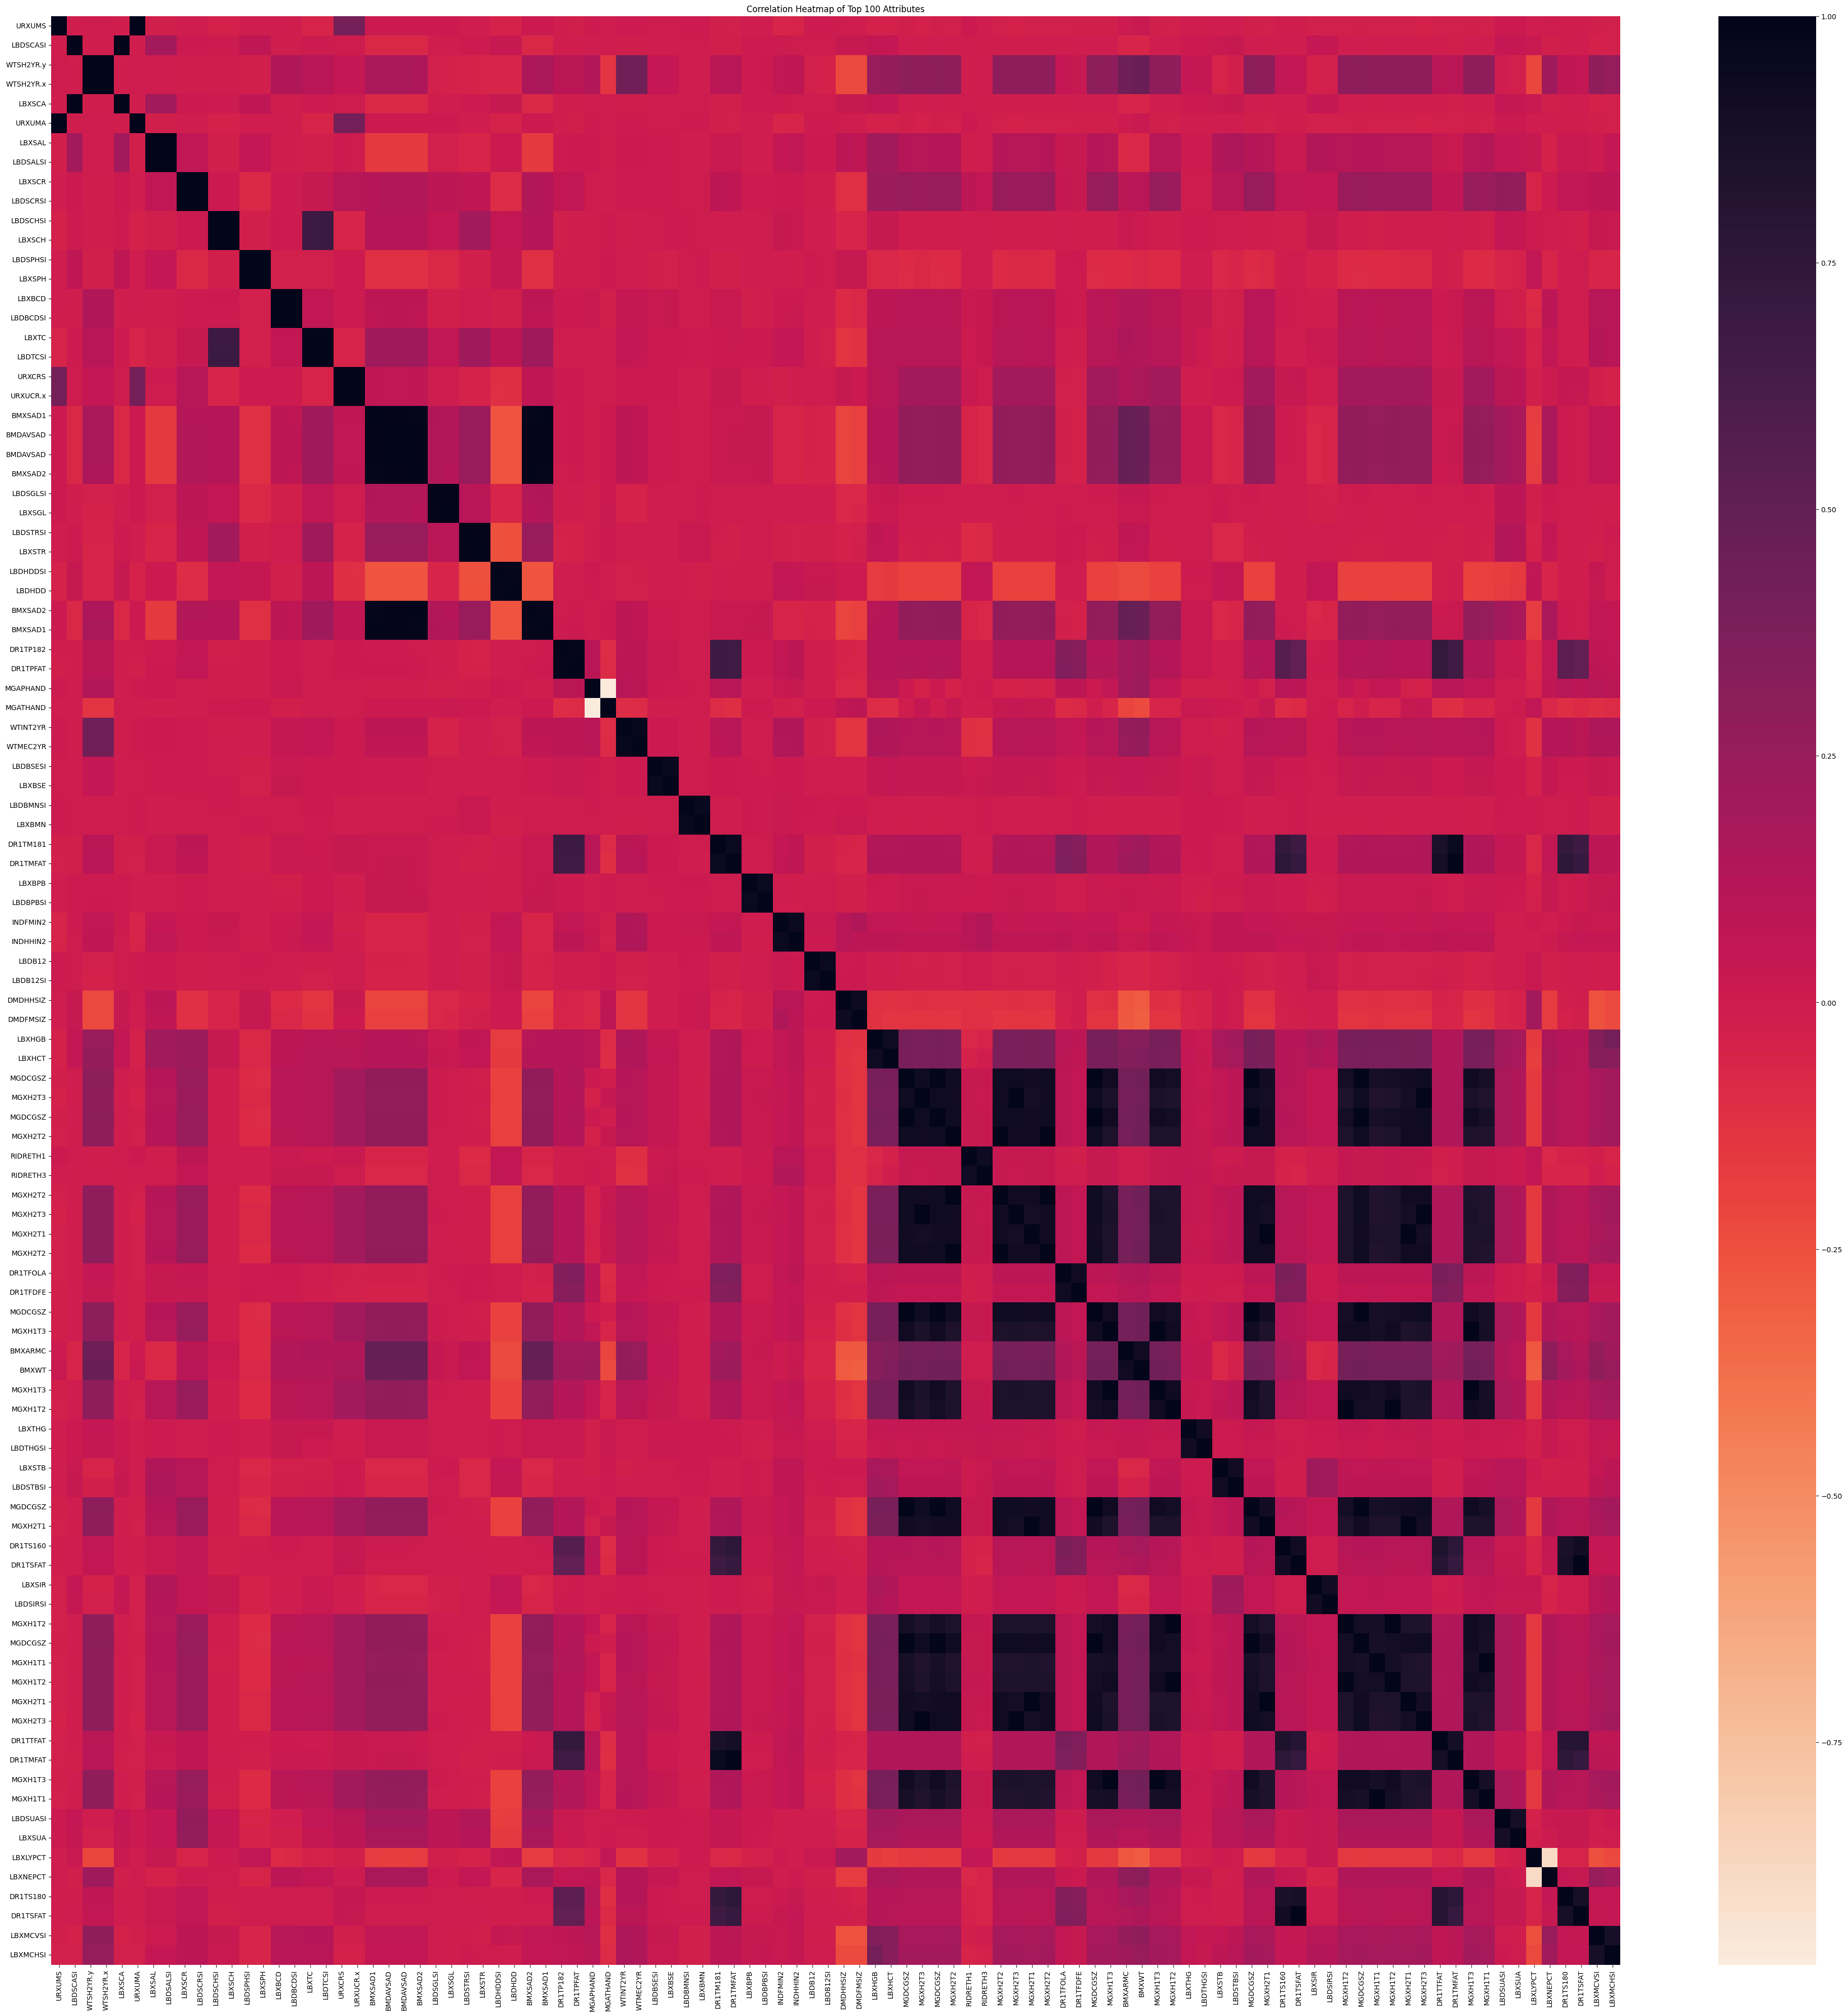

In [62]:
# Extract the column names from the index of top_100_attributes
columns = [pair[0] for pair in top_100_attributes.index]
print(f"The length of columns is: {len(columns)}")
# Subset the correlation_matrix using the extracted column names
subset_corr_matrix = correlation_matrix.loc[columns, columns]

# Plot the correlation heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(subset_corr_matrix, cmap='rocket_r')
plt.title('Correlation Heatmap of Top 100 Attributes')
plt.show()

## Feature Selection

In [63]:
# Step 1: Calculate the correlation matrix for all traits
correlation_matrix = merged_df_exam_lab_diet_demo.corr()

# Step 2: Identify highly correlated pairs
threshold = 0.8  # Set the correlation threshold
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Step 3: Choose one trait from each highly correlated pair
selected_traits = set()
for trait1, trait2 in highly_correlated_pairs:
    # Choose one trait based on a specific criterion
    # For example, choose the trait with the highest mean or the one that appears first in the list
    criterion_trait = trait1  # Replace this with your selection criterion
    selected_traits.add((trait1, trait2))

print("Selected Traits:")
for trait1, trait2 in selected_traits:
    print(f"From {trait1} and {trait2}, selected: {trait1}")

Selected Traits:
From WTSH2YR.x and WTSH2YR.y, selected: WTSH2YR.x
From LBDB12 and LBDB12SI, selected: LBDB12
From MGXH1T1 and MGXH2T2, selected: MGXH1T1
From MGXH1T1 and MGXH1T3, selected: MGXH1T1
From BMXWT and BMXWAIST, selected: BMXWT
From LBXBMN and LBDBMNSI, selected: LBXBMN
From OHX23CTC and OHX26CTC, selected: OHX23CTC
From DR1TS040 and DR1TS060, selected: DR1TS040
From URXUCR.x and URXCRS, selected: URXUCR.x
From OHX09CTC and OHX10CTC, selected: OHX09CTC
From DR1TPFAT and DR1TP182, selected: DR1TPFAT
From OHX19CTC and OHX30CTC, selected: OHX19CTC
From LBXLYPCT and LBXNEPCT, selected: LBXLYPCT
From MGXH2T2 and MGDCGSZ, selected: MGXH2T2
From LBXMCVSI and LBXMCHSI, selected: LBXMCVSI
From MGXH1T1 and MGXH2T3, selected: MGXH1T1
From BMXSAD1 and BMDAVSAD, selected: BMXSAD1
From MGXH1T2 and MGDCGSZ, selected: MGXH1T2
From LBDHDD and LBDHDDSI, selected: LBDHDD
From LBXSUA and LBDSUASI, selected: LBXSUA
From DR1TSFAT and DR1TS180, selected: DR1TSFAT
From DR1TS060 and DR1TS100, select

In [64]:
selected_traits

{('BMXARMC', 'BMXWAIST'),
 ('BMXBMI', 'BMXWAIST'),
 ('BMXSAD1', 'BMDAVSAD'),
 ('BMXSAD1', 'BMXSAD2'),
 ('BMXSAD2', 'BMDAVSAD'),
 ('BMXWT', 'BMXARMC'),
 ('BMXWT', 'BMXWAIST'),
 ('BPXSY1', 'BPXSY2'),
 ('BPXSY1', 'BPXSY3'),
 ('BPXSY2', 'BPXSY3'),
 ('DMDHHSIZ', 'DMDFMSIZ'),
 ('DR1TFOLA', 'DR1TFDFE'),
 ('DR1TMFAT', 'DR1TM181'),
 ('DR1TPFAT', 'DR1TP182'),
 ('DR1TPROT', 'DR1TSELE'),
 ('DR1TS040', 'DR1TS060'),
 ('DR1TS060', 'DR1TS100'),
 ('DR1TS100', 'DR1TS140'),
 ('DR1TS160', 'DR1TS180'),
 ('DR1TSFAT', 'DR1TS160'),
 ('DR1TSFAT', 'DR1TS180'),
 ('DR1TTFAT', 'DR1TM181'),
 ('DR1TTFAT', 'DR1TMFAT'),
 ('DR1TTFAT', 'DR1TS160'),
 ('DR1TTFAT', 'DR1TS180'),
 ('DR1TTFAT', 'DR1TSFAT'),
 ('INDFMIN2', 'INDFMPIR'),
 ('INDHHIN2', 'INDFMIN2'),
 ('INDHHIN2', 'INDFMPIR'),
 ('LBDB12', 'LBDB12SI'),
 ('LBDHDD', 'LBDHDDSI'),
 ('LBXBCD', 'LBDBCDSI'),
 ('LBXBMN', 'LBDBMNSI'),
 ('LBXBPB', 'LBDBPBSI'),
 ('LBXBSE', 'LBDBSESI'),
 ('LBXHGB', 'LBXHCT'),
 ('LBXLYPCT', 'LBXNEPCT'),
 ('LBXMCVSI', 'LBXMCHSI'),
 ('LBXSAL', 'LBD

#⬇ Dimensionality Reduction (PCA)

In [65]:
# Assuming `selected_traits` is a list of tuples
selected_features = [trait[0] for trait in selected_traits]

# Step 1: Prepare the data
selected_data = merged_df_exam_lab_diet_demo[selected_features]  # Replace with the selected feature names

# Step 2: Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_data)

# Step 3: Apply PCA
n_components = 2  # Specify the number of components to retain after dimensionality reduction
pca = PCA(n_components=n_components)
pca.fit(standardized_data)

# Step 4: Transform the data
pca_reduced_data = pca.transform(standardized_data)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the results
print("Reduced Data:")
print(pca_reduced_data)
print("")
print("Principal Components:")
print(principal_components)
print("")
print("Explained Variance Ratio:")
print(explained_variance_ratio)

Reduced Data:
[[-1.59741057  0.52454931]
 [ 2.83850547  3.57864585]
 [ 8.68760541 -2.12599444]
 ...
 [-0.3369056   5.32598078]
 [-9.61983433  1.65249403]
 [-5.56476352  4.14901768]]

Principal Components:
[[ 8.74344116e-02 -1.00327181e-02  1.92140665e-01  1.92140665e-01
   1.35393984e-01 -2.45587197e-03 -6.10777728e-02  1.87647577e-02
   4.48004259e-02 -5.48109120e-02  5.63291932e-02 -5.68666472e-02
  -5.20628934e-02  1.89594880e-01  5.77685592e-02  1.92140665e-01
   7.84317257e-02  1.91565720e-01 -4.97815947e-02  3.48279198e-02
   5.22193913e-02  1.76624449e-02  1.91069256e-01  1.29503184e-01
   1.91565720e-01  6.94167280e-02  6.55942030e-02  2.16654161e-02
   1.04324568e-02  5.84327696e-03 -9.54437538e-02  1.92140665e-01
   1.90229850e-01  2.99611442e-02  2.30299505e-02 -8.31346019e-02
   1.92140665e-01  1.89594880e-01  1.05877479e-01  6.24758839e-02
   6.55942030e-02 -6.22371034e-02  1.01390914e-02 -4.31073602e-02
   1.91069256e-01  5.22193913e-02  1.91565720e-01 -8.31346019e-02
  -

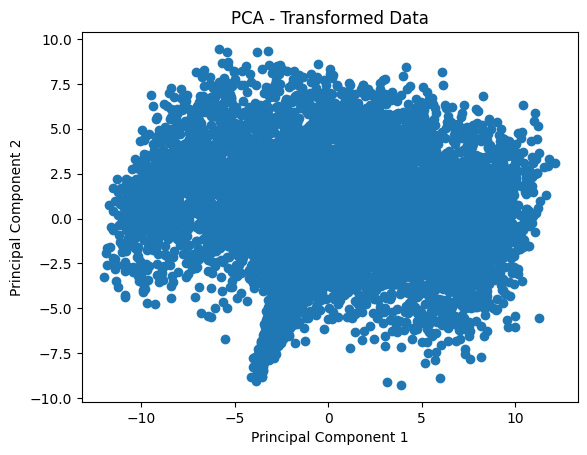

In [66]:

# Plot the transformed data
plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Transformed Data')
plt.show()

# 🔽 Dimensionality Reduction (Gaussian Random Projection)

In [67]:
# Create an imputer to fill missing values
imputer = SimpleImputer(strategy='median')

# Apply imputation to the DataFrame
imputed_df = imputer.fit_transform(merged_df_exam_lab_diet_demo)

random_projection = GaussianRandomProjection(n_components=2)
guassian_reduced_data = random_projection.fit_transform(imputed_df)

In [68]:
guassian_reduced_data

array([[-156865.71324681,   17960.33823655],
       [-185115.5064953 ,   39806.71530305],
       [-243435.28745518,   22960.7047811 ],
       ...,
       [-199191.57467221,   52228.30335432],
       [-157281.31657519,   21026.12445029],
       [-118886.13274225,  -14330.45532372]])

# 📝Training on Regression model for PCA

In [69]:
df_ques_filled = df_ques.fillna(2)


In [70]:
X = pca_reduced_data  # Replace pca_output with the output of PCA
y = df_ques_filled[['MCQ160L', 'MCQ220']]

In [72]:
# Get the unique 'SEQN' values from the smaller dataframe
unique_seqn = merged_df_exam_lab_diet_demo['SEQN'].unique()

# Filter the larger dataframe based on the 'SEQN' values
y = df_ques_filled[df_ques_filled['SEQN'].isin(unique_seqn)]
y = y[['MCQ160L', 'MCQ220']]

In [73]:
X_list = X.tolist()

In [74]:
y_list = y.values.tolist()

In [75]:
# Extract the first elements into a separate array
MCQ160L_elements = [sublist[0] for sublist in y_list]

# Extract the second elements into a separate array
MCQ220_elements = [sublist[1] for sublist in y_list]

## For Cancer(MCQ220)

In [96]:
X_train, X_test, y_train_MCQ220, y_test_MCQ220 = train_test_split(X_list, MCQ220_elements, test_size=0.3, random_state=42)

In [97]:
# Initialize regression models
linear_reg_pca = LinearRegression()
knn_reg_pca = KNeighborsRegressor()
decision_tree_reg_pca = DecisionTreeRegressor()

# Train the models
linear_reg_pca.fit(X_train, y_train_MCQ220)
knn_reg_pca.fit(X_train, y_train_MCQ220)
decision_tree_reg_pca.fit(X_train, y_train_MCQ220)

# Make predictions on the testing data
linear_reg_pred_pca_cancer = linear_reg_pca.predict(X_test)
knn_reg_pred_pca_cancer = knn_reg_pca.predict(X_test)
decision_tree_reg_pred_pca_cancer = decision_tree_reg_pca.predict(X_test)

# Evaluate the models with MSE
linear_reg_rmse_pca_cancer = mean_squared_error(y_test_MCQ220, linear_reg_pred_pca_cancer, squared=False)
knn_reg_rmse_pca_cancer = mean_squared_error(y_test_MCQ220, knn_reg_pred_pca_cancer, squared=False)
decision_tree_reg_rmse_pca_cancer = mean_squared_error(y_test_MCQ220, decision_tree_reg_pred_pca_cancer, squared=False)

# Evaluate the models with MAE
linear_reg_mae_pca_cancer = mean_absolute_error(y_test_MCQ220, linear_reg_pred_pca_cancer)
knn_reg_mae_pca_cancer = mean_absolute_error(y_test_MCQ220, knn_reg_pred_pca_cancer)
decision_tree_reg_mae_pca_cancer = mean_absolute_error(y_test_MCQ220, decision_tree_reg_pred_pca_cancer)

# Print the RMSE values
print("--------------------- Using PCA Reduced Data ---------------------")
print("Linear Regression MSE for Cancer Detection: ", linear_reg_rmse_pca_cancer)
print("----------------------------")
print("KNN Regression MSE for Cancer Detection: ", knn_reg_rmse_pca_cancer)
print("----------------------------")
print("Decision Tree Regression MSE for Cancer Detection: ", decision_tree_reg_rmse_pca_cancer)
print("=============================================")


# Print the MAR values
print("Linear Regression MAE for Cancer Detection: ", linear_reg_mae_pca_cancer)
print("----------------------------")
print("KNN Regression MAE for Cancer Detection: ", knn_reg_mae_pca_cancer)
print("----------------------------")
print("Decision Tree Regression MAE for Cancer Detection: ", decision_tree_reg_mae_pca_cancer)


--------------------- Using PCA Reduced Data ---------------------
Linear Regression MSE for Cancer Detection:  0.2345489610866928
----------------------------
KNN Regression MSE for Cancer Detection:  0.2520567568934667
----------------------------
Decision Tree Regression MSE for Cancer Detection:  0.32502090233786773
Linear Regression MAE for Cancer Detection:  0.10362948193953896
----------------------------
KNN Regression MAE for Cancer Detection:  0.10203804347826086
----------------------------
Decision Tree Regression MAE for Cancer Detection:  0.10563858695652174


## For Liver(MCQ160L)

In [98]:
X_train, X_test, y_train_MCQ160L, y_test_MCQ160L = train_test_split(X_list, MCQ160L_elements, test_size=0.3, random_state=42)

In [99]:
# Initialize regression models
linear_reg_pca = LinearRegression()
knn_reg_pca = KNeighborsRegressor()
decision_tree_reg_pca = DecisionTreeRegressor()

# Train the models
linear_reg_pca.fit(X_train, y_train_MCQ160L)
knn_reg_pca.fit(X_train, y_train_MCQ160L)
decision_tree_reg_pca.fit(X_train, y_train_MCQ160L)

# Make predictions on the testing data
linear_reg_pred_pca_liver = linear_reg_pca.predict(X_test)
knn_reg_pred_pca_liver = knn_reg_pca.predict(X_test)
decision_tree_reg_pred_pca_liver = decision_tree_reg_pca.predict(X_test)

# Evaluate the models with MSE
linear_reg_rmse_pca_liver = mean_squared_error(y_test_MCQ160L, linear_reg_pred_pca_liver, squared=False)
knn_reg_rmse_pca_liver = mean_squared_error(y_test_MCQ160L, knn_reg_pred_pca_liver, squared=False)
decision_tree_reg_rmse_pca_liver = mean_squared_error(y_test_MCQ160L, decision_tree_reg_pred_pca_liver, squared=False)

# Evaluate the models with MAE
linear_reg_mae_pca_liver = mean_absolute_error(y_test_MCQ160L, linear_reg_pred_pca_liver)
knn_reg_mae_pca_liver = mean_absolute_error(y_test_MCQ160L, knn_reg_pred_pca_liver)
decision_tree_reg_mae_pca_liver = mean_absolute_error(y_test_MCQ160L, decision_tree_reg_pred_pca_liver)

print("--------------------- Using PCA Reduced Data ---------------------")
# Print the RMSE values
print("Linear Regression MSE for Liver Detection:", linear_reg_rmse_pca_liver)
print("----------------------------")
print("KNN Regression MSE for Liver Detection:", knn_reg_rmse_pca_liver)
print("----------------------------")
print("Decision Tree Regression MSE for Liver Detection:", decision_tree_reg_rmse_pca_liver)
print("=============================================")


# Print the MAR values
print("Linear Regression MAE for Liver Detection: ", linear_reg_mae_pca_liver)
print("----------------------------")
print("KNN Regression MAE for Liver Detection: ", knn_reg_mae_pca_liver)
print("----------------------------")
print("Decision Tree Regression MAE for Liver Detection: ", decision_tree_reg_mae_pca_liver)

--------------------- Using PCA Reduced Data ---------------------
Linear Regression MSE for Liver Detection: 0.15937871445367988
----------------------------
KNN Regression MSE for Liver Detection: 0.16963836215032105
----------------------------
Decision Tree Regression MSE for Liver Detection: 0.20020370061297676
Linear Regression MAE for Liver Detection:  0.04635734643033035
----------------------------
KNN Regression MAE for Liver Detection:  0.0452445652173913
----------------------------
Decision Tree Regression MAE for Liver Detection:  0.04008152173913043


# ✏ Training on Regression model for Gaussian Random Projection

In [87]:
X = guassian_reduced_data.tolist()

## For Cancer(MCQ220)

In [94]:
X_train, X_test, y_train_MCQ220, y_test_MCQ220 = train_test_split(X, MCQ220_elements, test_size=0.3, random_state=42)

In [95]:
# Initialize regression models
linear_reg_gau = LinearRegression()
knn_reg_gau = KNeighborsRegressor()
decision_tree_reg_gau = DecisionTreeRegressor()

# Train the models
linear_reg_gau.fit(X_train, y_train_MCQ220)
knn_reg_gau.fit(X_train, y_train_MCQ220)
decision_tree_reg_gau.fit(X_train, y_train_MCQ220)

# Make predictions on the testing data
linear_reg_pred_gau_cancer = linear_reg_gau.predict(X_test)
knn_reg_pred_gau_cancer = knn_reg_gau.predict(X_test)
decision_tree_reg_pred_gau_cancer = decision_tree_reg_gau.predict(X_test)

# Evaluate the models with MSE
linear_reg_rmse_gau_cancer = mean_squared_error(y_test_MCQ220, linear_reg_pred_gau_cancer, squared=False)
knn_reg_rmse_gau_cancer = mean_squared_error(y_test_MCQ220, knn_reg_pred_gau_cancer, squared=False)
decision_tree_reg_rmse_gau_cancer = mean_squared_error(y_test_MCQ220, decision_tree_reg_pred_gau_cancer, squared=False)

# Evaluate the models with MAE
linear_reg_mae_gau_cancer = mean_absolute_error(y_test_MCQ220, linear_reg_pred_gau_cancer)
knn_reg_mae_gau_cancer = mean_absolute_error(y_test_MCQ220, knn_reg_pred_gau_cancer)
decision_tree_reg_mae_gau_cancer = mean_absolute_error(y_test_MCQ220, decision_tree_reg_pred_gau_cancer)

print("--------------------- Using Gaussian Random Projection Reduced Data ---------------------")
# Print the RMSE values
print("Linear Regression MSE for Cancer Detection: ", linear_reg_rmse_gau_cancer)
print("----------------------------")
print("KNN Regression MSE for Cancer Detection: ", knn_reg_rmse_gau_cancer)
print("----------------------------")
print("Decision Tree Regression MSE for Cancer Detection: ", decision_tree_reg_rmse_gau_cancer)
print("=============================================")


# Print the MAR values
print("Linear Regression MAE for Cancer Detection: ", linear_reg_mae_gau_cancer)
print("----------------------------")
print("KNN Regression MAE for Cancer Detection: ", knn_reg_mae_gau_cancer)
print("----------------------------")
print("Decision Tree Regression MAE for Cancer Detection: ", decision_tree_reg_mae_gau_cancer)

--------------------- Using Gaussian Random Projection Reduced Data ---------------------
Linear Regression MSE for Cancer Detection:  0.2337204615909028
----------------------------
KNN Regression MSE for Cancer Detection:  0.25297147115315455
----------------------------
Decision Tree Regression MSE for Cancer Detection:  0.3202835021338602
Linear Regression MAE for Cancer Detection:  0.10213023048001295
----------------------------
KNN Regression MAE for Cancer Detection:  0.10285326086956523
----------------------------
Decision Tree Regression MAE for Cancer Detection:  0.10258152173913043


## For Liver(MCQ160L)

In [91]:
X_train, X_test, y_train_MCQ160L, y_test_MCQ160L = train_test_split(X, MCQ160L_elements, test_size=0.3, random_state=42)

In [93]:
# Initialize regression models
linear_reg_gau = LinearRegression()
knn_reg_gau = KNeighborsRegressor()
decision_tree_reg_gau = DecisionTreeRegressor()

# Train the models
linear_reg_gau.fit(X_train, y_train_MCQ160L)
knn_reg_gau.fit(X_train, y_train_MCQ160L)
decision_tree_reg_gau.fit(X_train, y_train_MCQ160L)

# Make predictions on the testing data
linear_reg_pred_gau_liver = linear_reg_gau.predict(X_test)
knn_reg_pred_gau_liver  = knn_reg_gau.predict(X_test)
decision_tree_reg_pred_gau_liver  = decision_tree_reg_gau.predict(X_test)

# Evaluate the models with MSE
linear_reg_rmse_gau_liver  = mean_squared_error(y_test_MCQ160L, linear_reg_pred_gau_liver , squared=False)
knn_reg_rmse_gau_liver  = mean_squared_error(y_test_MCQ160L, knn_reg_pred_gau_liver , squared=False)
decision_tree_reg_rmse_gau_liver  = mean_squared_error(y_test_MCQ160L, decision_tree_reg_pred_gau_liver , squared=False)

# Evaluate the models with MAE
linear_reg_mae_gau_liver  = mean_absolute_error(y_test_MCQ160L, linear_reg_pred_gau_liver )
knn_reg_mae_gau_liver  = mean_absolute_error(y_test_MCQ160L, knn_reg_pred_gau_liver )
decision_tree_reg_mae_gau_liver  = mean_absolute_error(y_test_MCQ160L, decision_tree_reg_pred_gau_liver )

print("--------------------- Using Gaussian Random Projection Reduced Data ---------------------")
# Print the RMSE values
print("Linear Regression MSE for Liver Detection: ", linear_reg_rmse_gau_cancer)
print("----------------------------")
print("KNN Regression MSE for Liver Detection: ", knn_reg_rmse_gau_cancer)
print("----------------------------")
print("Decision Tree Regression MSE for Liver Detection: ", decision_tree_reg_rmse_gau_cancer)
print("=============================================")


# Print the MAR values
print("Linear Regression MAE for Liver Detection: ", linear_reg_mae_gau_cancer)
print("----------------------------")
print("KNN Regression MAE for Liver Detection: ", knn_reg_mae_gau_cancer)
print("----------------------------")
print("Decision Tree Regression MAE for Liver Detection: ", decision_tree_reg_mae_gau_cancer)

--------------------- Using Gaussian Random Projection Reduced Data ---------------------
Linear Regression MSE for Liver Detection:  0.2337204615909028
----------------------------
KNN Regression MSE for Liver Detection:  0.25297147115315455
----------------------------
Decision Tree Regression MSE for Liver Detection:  0.32134229345857573
Linear Regression MAE for Liver Detection:  0.10213023048001295
----------------------------
KNN Regression MAE for Liver Detection:  0.10285326086956523
----------------------------
Decision Tree Regression MAE for Liver Detection:  0.10326086956521739
